In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
#Encoding categorical variables
categorical_features = ['person_gender', 'person_education', 'person_home_ownership', 
                        'loan_intent', 'previous_loan_defaults_on_file']
for feature in categorical_features:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [7]:
#Scaling numeric variable
scaler = StandardScaler()
numeric_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [8]:
#Train Test Split
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training
-

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Confusion Matrix:
 [[6544  446]
 [ 544 1466]]


In [11]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
y_pred1 = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Accuracy: 0.8998888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      6990
           1       0.77      0.78      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000

Confusion Matrix:
 [[6527  463]
 [ 438 1572]]


In [13]:
svc = SVC(kernel = 'linear', random_state=0)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
y_pred2 = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.8898888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Confusion Matrix:
 [[6551  439]
 [ 552 1458]]


In [15]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred3 = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))

Accuracy: 0.9283333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Confusion Matrix:
 [[6795  195]
 [ 450 1560]]


In [ ]:
Model training 

In [33]:
import tensorflow as tf

In [112]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=13, activation='relu'))
ann.add(tf.keras.layers.Dense(units=13, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [114]:
a = ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [130]:
b = ann.fit(X_train, y_train, batch_size = 32,epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9120 - loss: 0.1931
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9101 - loss: 0.1967
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9091 - loss: 0.1962
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9120 - loss: 0.1931
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9069 - loss: 0.2007
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9086 - loss: 0.1957
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9086 - loss: 0.1982
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9101 - loss: 0.1941
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9089 - loss: 0.1959
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9122 - loss: 0.1931


In [132]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6716  274]
 [ 530 1480]]


0.9106666666666666

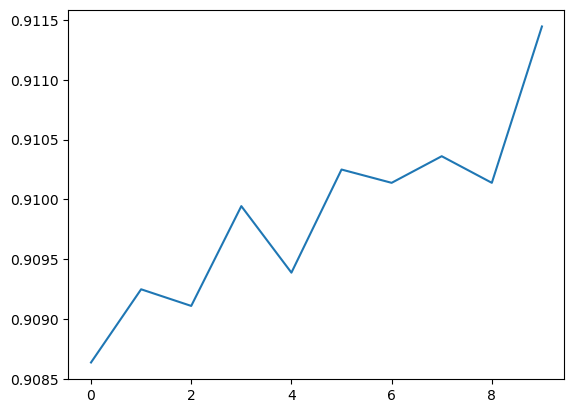

In [136]:
import matplotlib.pyplot as plt
#plt.plot(b.history['loss'])
plt.plot(b.history['accuracy'])
plt.show()